# Hourly Energy Consumption using PJM USA Dataset

#### Business Problem: #####

The aim is to develop a powerful and intelligent system for monitoring electricity
consumption. The purpose of this case study is to compare modern analysis
methods,modelling and forecasting the consumption of energy.<br>
The development of such analysis helps in effectively planning,predicting and
monitoring the growing need to energy as many operating decisions are based
on load forecasts such as dispatch scheduling of generating capacity,reliability
analysis,and maintenance planning for generator.


##### Machine Learning Problem: #####

This is a time series regression problem.Using the time series data by PJM USA we have to predict the energy consumption in the future.

##### Performance Metrics: #####
For this problem statement we will be using RMSE (Root Mean Square Error).
Since there is a lot of fluctuation in energy consumption so RSME will penalize the model when error is high, and thus RSME gives a relatievely high weight to large errors.

##### Other Performance Metrics: #####
MAE (Mean Absolute Error)<br>
MAPE (Mean Absolute Percentage Error)<br>


##### Data Overview: #####
The dataset contains 2 columns – Datetime and PJME_MW ie hourly electricity
record in megawatts and has total of 145366 records<br>
The data has been collected from Kaggle.com ,the main file is “PJM_load_hourly.csv” on which we have to make models.We can create some time series features based on datetime column.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime as dt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
import warnings
warnings.filterwarnings( 'ignore' )

## EDA

##### Reading Data

In [2]:
pjm_data = pd.read_csv('PJME_hourly.csv',parse_dates=[0])
pjm_data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


### Descriptive statistics

##### No.of rows and columns

In [3]:
print( 'Number of Rows: {}'.format(pjm_data.shape[0] ) )
print( 'Number of Cols: {}'.format(pjm_data.shape[1] ) )

Number of Rows: 145366
Number of Cols: 2


##### Datatypes

In [4]:
pjm_data.dtypes

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

<hr7> observation: </hr7>  we can see the the Datetime is in required date-time format type  and column PJME_MW is float type

In [5]:
print(type(pjm_data))

<class 'pandas.core.frame.DataFrame'>


##### Description 

In [6]:
#descriptive statistics
pjm_data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


Obsevation : The total datapoints is matching,the mean energy consumption 32080 MW while max energy consumption is 62009 MW

##### Information about dataset

In [7]:
pjm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


From above we can see there are 2 columns  - one is Datetime datape and other is float datatype which is also a target variable for forecasting

##### Checking for any missing values

In [8]:
pjm_data.isnull().sum(axis=0)

Datetime    0
PJME_MW     0
dtype: int64

There is no null values in our dataset so there is no requirement of imputating missing values

##### Checking for any duplication

In [9]:
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
pjm_data.duplicated().any()

False

We can see that there is no duplication in our dataset since energy consumption is varying every hour,but it would be better to check duplicacy on Datetime to check whether there are duplicates records are there or not on same date.

In [10]:
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
pjm_data['Datetime'].duplicated().any()

True

We can see from above code that there are some duplicates dates records <br>
Lets see how many duplicates records we have in our data

In [11]:
# Count duplicate on a column
pjm_data['Datetime'].duplicated().sum()

4

So we have a total 4 duplicates records ,lets check what the duplicate records are

In [12]:
#Count the number of non-duplicates
(~pjm_data['Datetime'].duplicated()).sum()

145362

In [13]:
pjm_data['Datetime'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145361    False
145362    False
145363    False
145364    False
145365    False
Name: Datetime, Length: 145366, dtype: bool

In [14]:
# Extract duplicate rows
pjm_data.loc[pjm_data["Datetime"].duplicated(keep=False), :]

,Datetime,PJME_MW
106584,2014-11-02 02:00:00,22935.0
106585,2014-11-02 02:00:00,23755.0
115368,2015-11-01 02:00:00,21567.0
115369,2015-11-01 02:00:00,21171.0
124008,2016-11-06 02:00:00,20795.0
124009,2016-11-06 02:00:00,21692.0
132816,2017-11-05 02:00:00,21236.0
132817,2017-11-05 02:00:00,20666.0


From above we can see for year 2017 we have duplicate records for date Nov 1,Nov 2,Nov 5,Nov 6 and on same time<br>
Lets remove the dulicate records keeping only the first record

In [15]:
#removing duplicate rows
pjm_data = pjm_data.drop_duplicates(subset={"Datetime"},keep='first',inplace=False)
print('shape after removing duplicates : ',pjm_data.shape)

shape after removing duplicates :  (145362, 2)


In [16]:
pjm_data.tail(3)

,Datetime,PJME_MW
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [17]:
pjm_data['Datetime'].duplicated().any()

False

Now there is no duplicate records in the data

In [18]:
pjm_data.duplicated().any()

False

##### Lets look how the time series data look like

In [19]:
def series_plot(x,y,data,kind,color,title,figsize):
    data.plot(kind = kind,
             x=x,
             y=y,
             color = color,
             figsize=figsize)
    plt.title(title)
    plt.show()

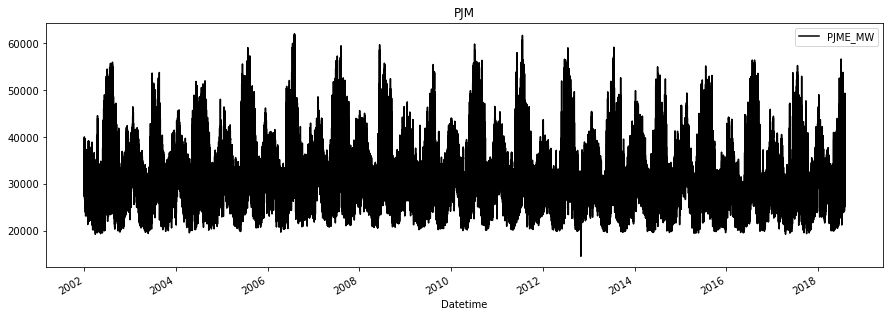

In [20]:
figsize = (15,5)
pjm_data_plot = series_plot('Datetime','PJME_MW',pjm_data,'line','black','PJM',figsize)

##### Setting Datetime column as index

In [21]:
#copying the original dataframe
pjm_df = pjm_data.copy()
pjm_df.index = pjm_df['Datetime']
del pjm_df['Datetime']
pjm_df.head(3)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0


##### Looking the series plot for year 2016 and 2017 separately

Text(0, 0.5, 'Energy Consumption (MW)')

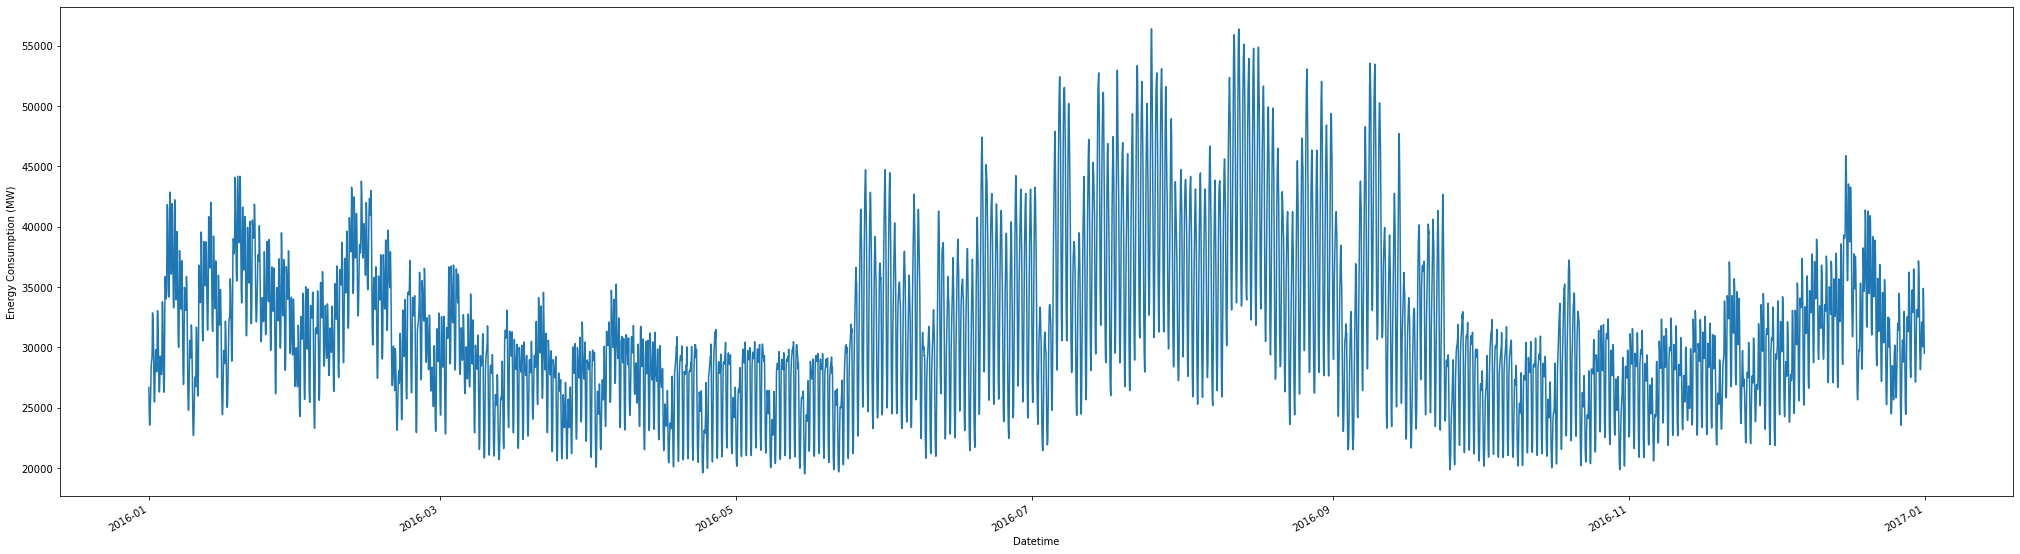

In [22]:
year_2016 = pjm_df.loc['2016','PJME_MW'].plot(figsize=(35,10))
year_2016.set_ylabel('Energy Consumption (MW)')

Text(0, 0.5, 'Energy Consumption (MW)')

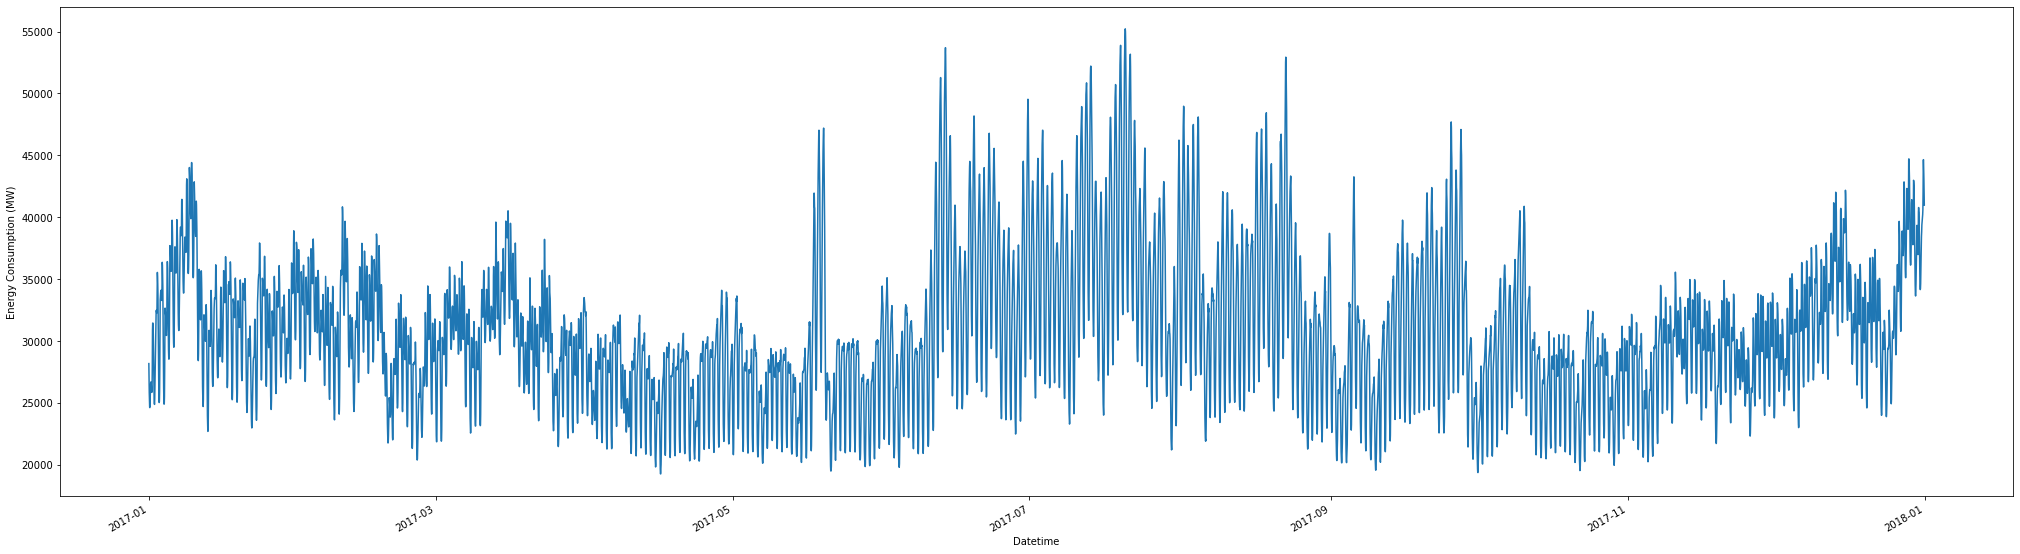

In [23]:
year_2017 = pjm_df.loc['2017','PJME_MW'].plot(figsize=(35,10))
year_2017.set_ylabel('Energy Consumption (MW)')

From the above two plots we can clearly see the weekly variation or oscillations of energy consumption.

From above two plots we can see the series look same means the up and downs distribution are same ie energy consumption is is reducing in the month for both year although the magnitude is different for each year<br>
we will see the series plot for all year later

##### Zooming a bit the 2017 & 2016 first 3 month data

Text(0, 0.5, 'Energy Consumption (MW)')

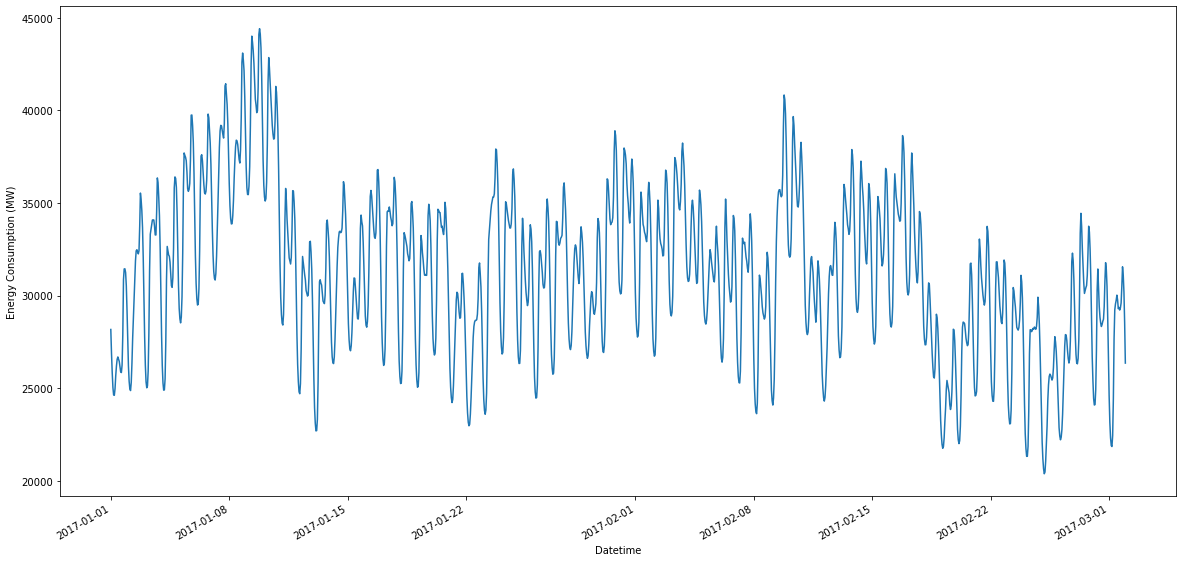

In [24]:
year_2017 = pjm_df.loc['2017-01-01':'2017-03-01','PJME_MW'].plot(figsize=(20,10))
year_2017.set_ylabel('Energy Consumption (MW)')

Text(0, 0.5, 'Energy Consumption (MW)')

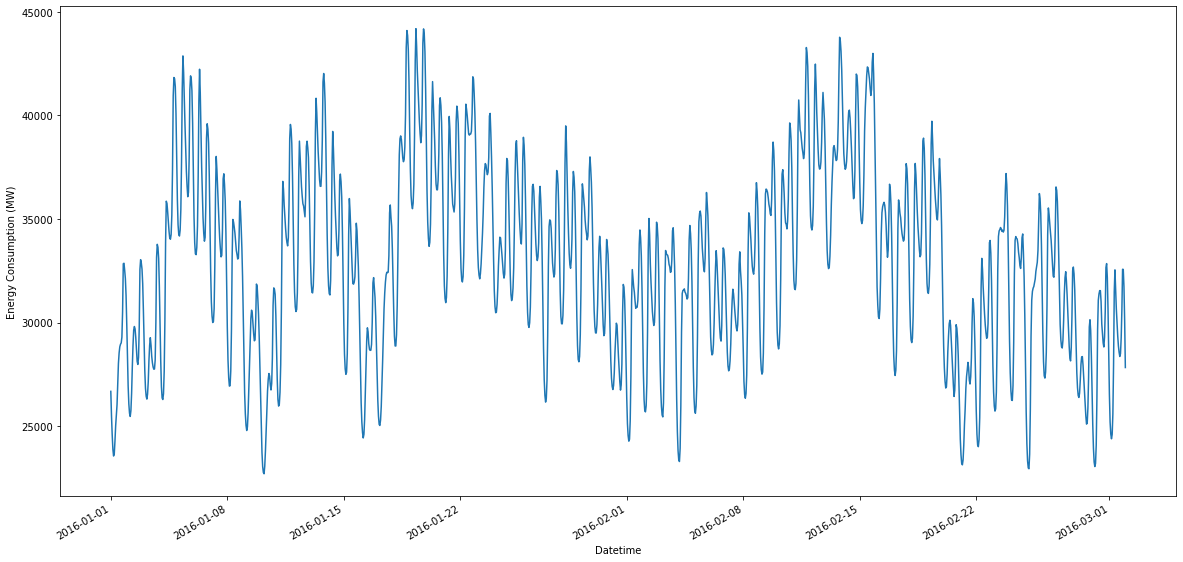

In [25]:
year_2016 = pjm_df.loc['2016-01-01':'2016-03-01','PJME_MW'].plot(figsize=(20,10))
year_2016.set_ylabel('Energy Consumption (MW)')

From the above two plots it can be seen that energy consumption is increasing on start of the weeks and then decresing as days reaches weekend<br>
It can be more confirmed later through barplots with some additional features

## Additive Time Series or Multiplicative Time Series

#### 1.Additive Decomposition


The equation for additive time series is simply: $Outcome_{t} = Trend_{t} + Seasonality_{t} + Residual_{t}$ 
  
$_t$ is a variable representing a particular point in time 

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
pjm_df_decomposition = seasonal_decompose(x=pjm_df, model='additive',period = 6)
pjm_estimated_trend = pjm_df_decomposition.trend
pjm_estimated_seasonal = pjm_df_decomposition.seasonal
pjm_estimated_residual = pjm_df_decomposition.resid

###### Additive plots

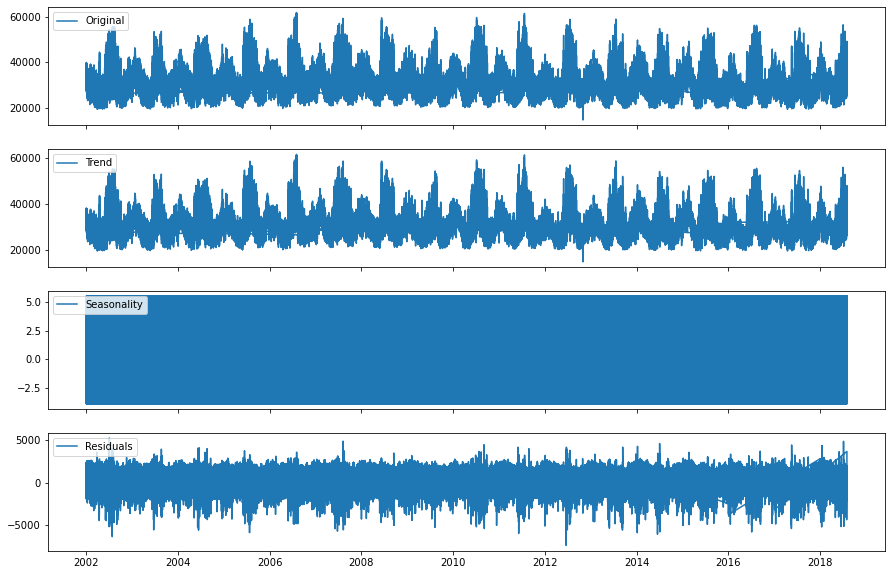

In [27]:
#additive plots

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(pjm_df, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(pjm_estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(pjm_estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(pjm_estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

#### Multiplicative Decomposition

The equation for additive time series is simply: $Outcome_{t} = Trend_{t} * Seasonality_{t} * Residual_{t}$ 
  
$_t$ is a variable representing a particular point in time 

In [28]:
pjm_df_mul_decomposition = seasonal_decompose(x=pjm_df, model='multiplicative',period = 6)
pjm_mul_estimated_trend = pjm_df_mul_decomposition.trend
pjm_mul_estimated_seasonal = pjm_df_mul_decomposition.seasonal
pjm_mul_estimated_residual = pjm_df_mul_decomposition.resid

##### Multiplicative Plots

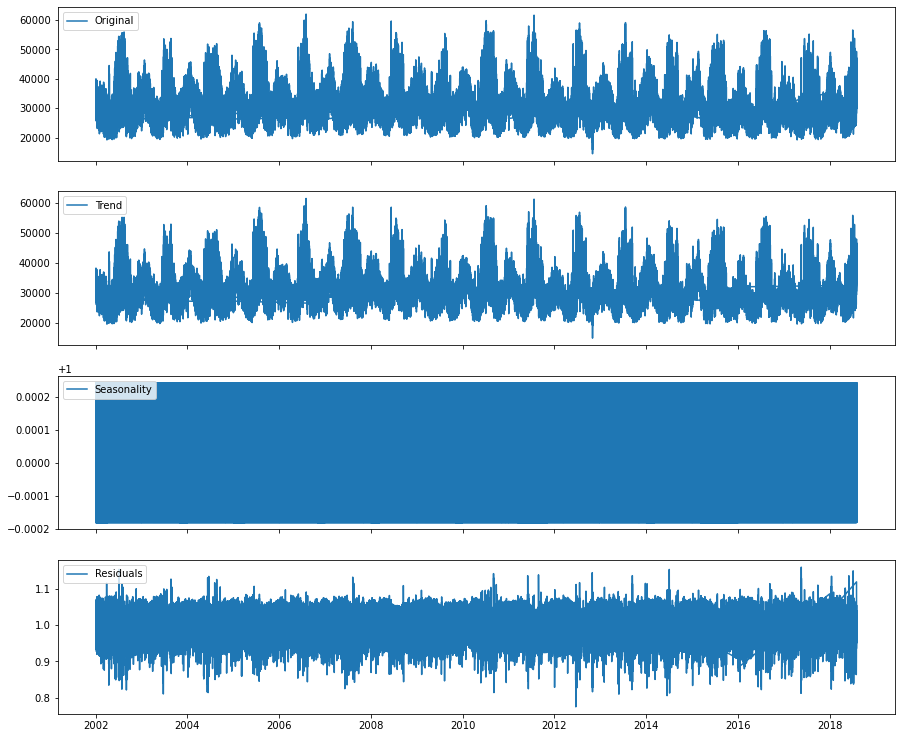

In [29]:
#multiplicative plots

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(13)
fig.set_figwidth(15)

axes[0].plot(pjm_df, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(pjm_mul_estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(pjm_mul_estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(pjm_mul_estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

The series is Multiplicative time series as when looking at residual plot for both additive and multiplicative decomposition the 
magnitude of residual is less in multiplicative decomposition while the trend and seasonality for both are looking same

## Whether time series is Stationary or Non-Stationary
### What is Stationarity?
In order for time series data to be stationary, the data must exhibit four properties over time:
1. **constant mean**
2. **constant variance**
3. **constant autocorrelation structure**
4. **no periodic component**<br>
Note:Autocorrelation simply means that the current time series measurement is correlated with a past measurement<br><br>
For time series to be non-stationary,the data must exibhit following properties<br>

a. **Trend** (changing mean)<br>
b. **Heteroscedasticity** (changing variance)<br>
c. **Seasonality** (periodic component)<br>
d. **Trend + Seasonality**<br>


#### Hypothesis Testing 

In order to determine whether the time series is stationary or not we will do statistical procedure called Hypothesis testing (Augmented Dickey-Fuller test)
where:<br>
1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

We will set a significance level or threshold that determines whether you should accept or reject the null. 
> The value 0.05 is common but depends upons various factors depending on domain

we will use statsmodel library

In [30]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(pjm_df)

In [31]:
print(adf)

-18.825577048733457


adf is the value of the test statistic or ground truth. The more negative the value, the more confident we are that the given series is stationary. 

In [32]:
print(pvalue)

2.02214003326972e-30


p-value is close to zero ,we are rejecting the null hypothesis ie series is non stationary

In [33]:
print(critical_values)

{'1%': -3.430395010328113, '5%': -2.861559893928185, '10%': -2.5667805888299307}


Critical value is representing the common significance levels

##### Autocorrelation plot

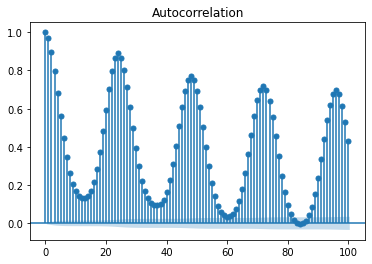

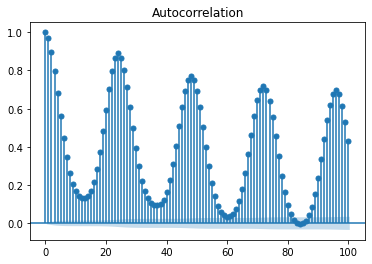

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pjm_df,lags=100)

Important thing to notice is that according to ADF and P-value we are rejecting null hupothesis and telling that series is stationary but according to definition of stationary and non-stationary series it can be concluded that the series is actually non-stationary because it has seasonality<br><br>
And above autocorrelation plot is also not constant but for series to be stationary it must be constant<br>
It may be because the ADf have low power meaning they either need lots and lots of data or they may incorrecly reject the null hypothesis when in fact the null is true<br>
So it is necessary to apply some transformation to make series stationary

## Resampling

Plotting the line plot for energy consumption plot by converting it to weekly,monthly,quartely and annually and see what insight the plot os showing

In [35]:
#weekly
pjm_weekly = pjm_df.resample('W').sum()
print('Weekly Energy Consumption')
print(pjm_weekly.head(), '\n')

#monthly
pjm_monthly = pjm_df.resample('M').sum()
print('Monthly Energy Consumption')
print(pjm_monthly.head(), '\n')

#quartely
pjm_quarterly = pjm_df.resample('Q').sum()
print('Quarterly Energy Consumption')
print(pjm_quarterly.head(), '\n')

#Annually
pjm_annual = pjm_df.resample('Y').sum()
print('Annual Energy Consumption')
print(pjm_df.head())

Weekly Energy Consumption
              PJME_MW
Datetime             
2002-01-06  4632079.0
2002-01-13  5289881.0
2002-01-20  5284084.0
2002-01-27  5063777.0
2002-02-03  4905010.0 

Monthly Energy Consumption
               PJME_MW
Datetime              
2002-01-31  23089022.0
2002-02-28  20320720.0
2002-03-31  21483191.0
2002-04-30  20516472.0
2002-05-31  20886798.0 

Quarterly Energy Consumption
               PJME_MW
Datetime              
2002-03-31  64892933.0
2002-06-30  65585132.0
2002-09-30  79108260.0
2002-12-31  66833784.0
2003-03-31  71369273.0 

Annual Energy Consumption
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


<AxesSubplot:title={'center':'Weekly Energy Consumption'}, xlabel='Datetime'>

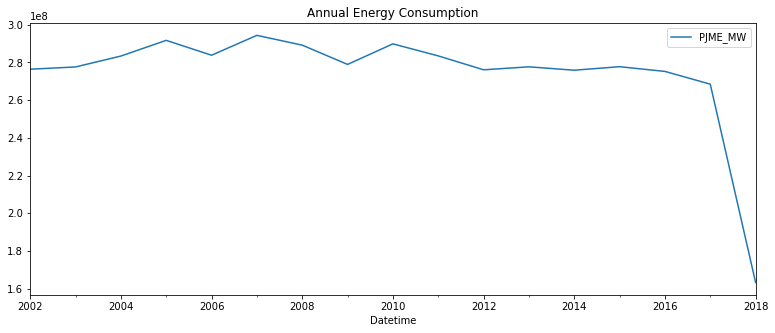

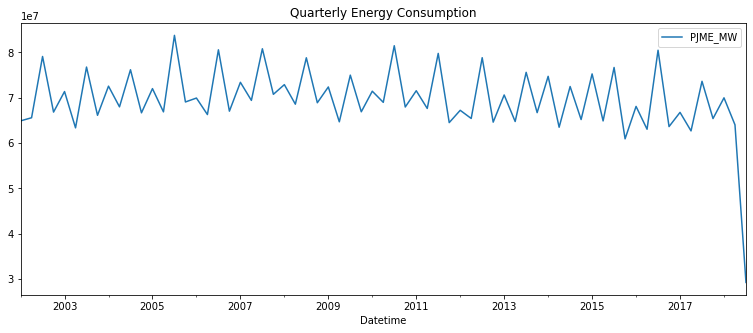

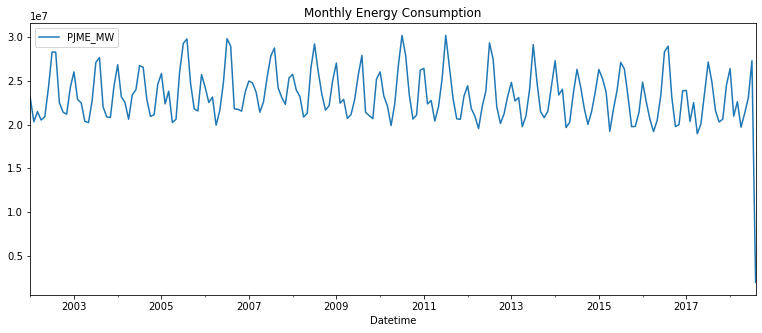

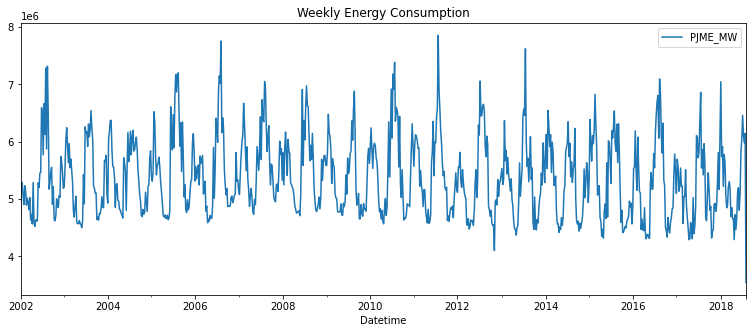

In [36]:
plotsize = (13, 5)
pjm_annual.plot(figsize=plotsize, title='Annual Energy Consumption')
pjm_quarterly.plot(figsize=plotsize, title='Quarterly Energy Consumption')
#plt.title('Monthly Sales')
pjm_monthly.plot(figsize=plotsize, title='Monthly Energy Consumption')
#plt.title('Monthly Sales')
pjm_weekly.plot(figsize=plotsize, title='Weekly Energy Consumption')
#plt.title('Monthly Sales')

1. In annual plot from 2002 to 2012 the energy consumption is showing peak and valley pattern ie every adjacent year consumption is increasing and decreasing and from 2012 the energy consumption is almost like a constant and then decreasing in 2018 may be due to all data has not been recorded for all 12 month<br>
2. In quater and monthly plot again plot has lot of peak and valley but it is difficult to find insight so later will plot boxplot to get the clear insight.<br>
3. in weekly plot also the plot has peak and valley and can be seen that as the week start the energy consumption increases and as weekend arrives energy consumption decreases

##### Plotting daily and weekly energy consumption for first 6 months for the year 2016

In [37]:
#weekly mean
pjm_weekly_mean = pjm_df.resample('W').mean()
print('Weekly Mean Energy Consumption')
print(pjm_weekly_mean.head(), '\n')

Weekly Mean Energy Consumption
                 PJME_MW
Datetime                
2002-01-06  32392.160839
2002-01-13  31487.386905
2002-01-20  31452.880952
2002-01-27  30141.529762
2002-02-03  29196.488095 



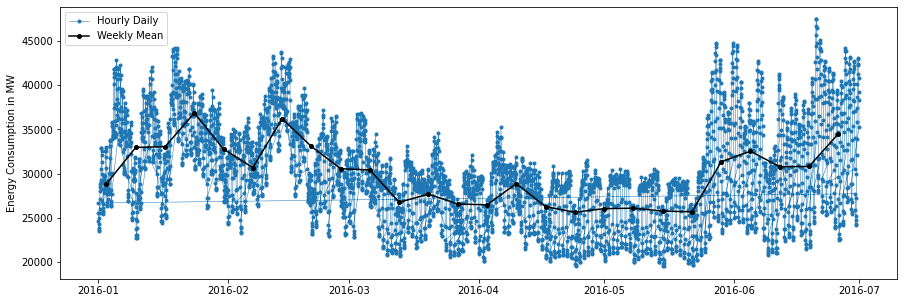

In [38]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(pjm_df.loc['2016-01':'2016-06','PJME_MW'],marker='.',linestyle='-',linewidth=0.5,label='Hourly Daily')
ax.plot(pjm_weekly_mean.loc['2016-01':'2016-06','PJME_MW'],marker='o',markersize=4,linestyle='-',color='k',label='Weekly Mean')
ax.set_ylabel("Energy Consumption in MW")
ax.legend()

We can see that the weekly mean energy consumption time series is much smoother than the hourly energy consumption time series because higher frequency variability has been averaged out in the resampling

##### Looking the series for all year by pivoting data

<AxesSubplot:xlabel='Datetime'>

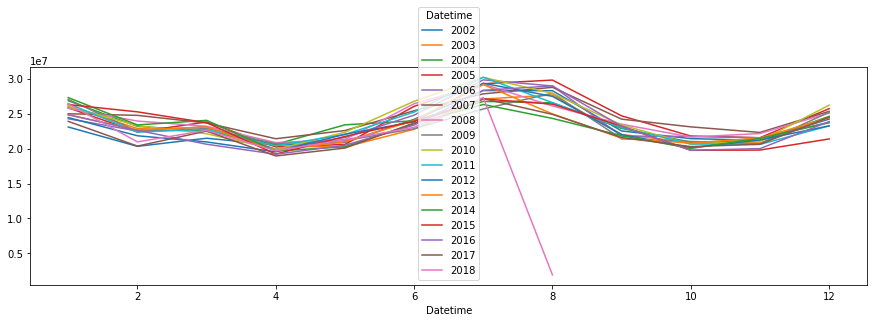

In [39]:
pv = pd.pivot_table(pjm_df, index=pjm_df.index.month, columns=pjm_df.index.year,
                    values='PJME_MW', aggfunc='sum')
pv.plot(figsize=(15,4))


We can see the energy consumption plot looks similar for all years only difference in magnitude of energy consumption except 2018 as data are not recorded for complete 2018

<AxesSubplot:xlabel='Datetime'>

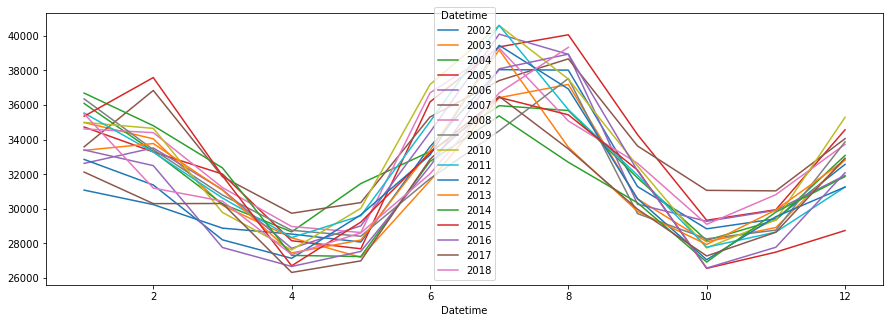

In [40]:
pv1 = pd.pivot_table(pjm_df, index=pjm_df.index.month, columns=pjm_df.index.year,
                    values='PJME_MW', aggfunc='mean')
pv1.plot(figsize=(15,5))

Similar behaviour can be seen when looking at the mean of energy consumption for all years

##### Distribution of Target Variable-PJME_MW

<Figure size 1440x360 with 0 Axes>

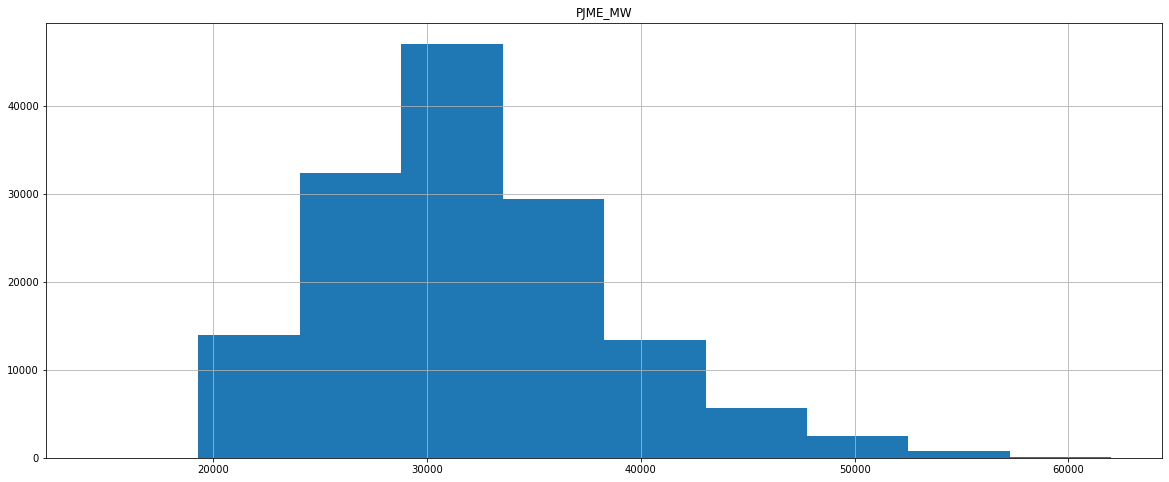

In [73]:
#histogram and density plot
pjm_df.hist(column="PJME_MW",figsize=(20,8))
plt.show()

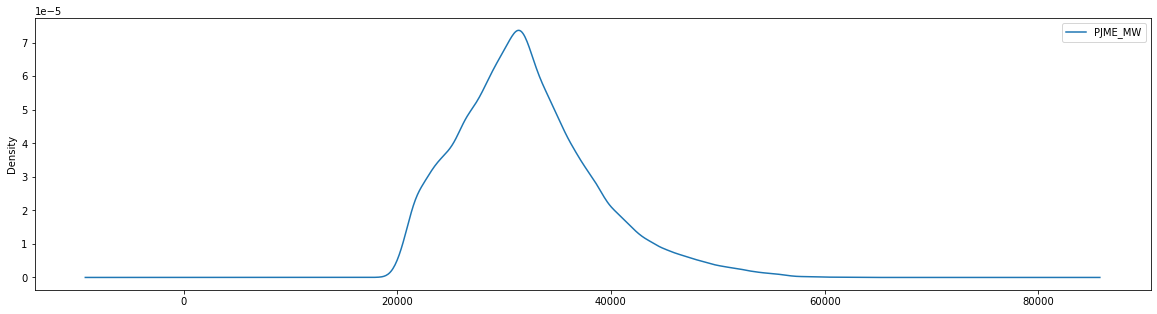

In [42]:
pjm_df.plot(kind='kde',figsize=(20,5))
plt.show()

From above figure it can be seen that the distribution is right skewed,so it also give a strong evidence for applying natural feature transform as we can do standardization or normalization sinve the distribution is not gaussian

## EDA with features from Dateime 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
    
From the above two links we can add some features based on Datetime and can do EDA to get some more insights on data,<br>
The features icluding are :<br>
date<br>
hour<br>day of week<br>quarter<br>month<br>year<br>day of year<br>day of month<br>week of year<br>

In [43]:
pjm_data['date'] = pd.to_datetime(pjm_data['Datetime'].dt.date)
pjm_data['hour'] = pjm_data['Datetime'].dt.hour
pjm_data['dayofweek'] = pjm_data['Datetime'].dt.dayofweek
pjm_data['quarter'] = pjm_data['Datetime'].dt.quarter
pjm_data['month'] = pjm_data['Datetime'].dt.month
pjm_data['year'] = pjm_data['Datetime'].dt.year
pjm_data['dayofyear'] = pjm_data['Datetime'].dt.dayofyear
pjm_data['dayofmonth'] = pjm_data['Datetime'].dt.day
pjm_data['weekofyear'] = pjm_data['Datetime'].dt.weekofyear


In [44]:
## day_of_week:converting it to categorical attribute

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday
weekday_names = {0:'Monday',1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
pjm_data['weekday_name'] = pjm_data['Datetime'].dt.dayofweek.map(weekday_names)

### Other features

since now in above data we have months attribute and based on month attributes we can come up with other attributes name "Season"and
and we can look how  the energy consumption behaviour on fifferent season<br>
below link have the seasons informations <br>
https://www.gousa.in/info/weather-seasons <br>
The above link shows season patterns in USA where <br>
Summer: June - August<br>
Fall: September - November<br>
Winter: December - February<br>
Spring: March - May

In [45]:
def season_attribute(month):
    if month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Fall"
    elif month in [12,1,2]:
        return "Winter"
    else:
        return "Spring"

In [46]:
pjm_data['season'] = pjm_data['Datetime'].dt.month.apply(season_attribute)

Other interesting thing can be knowing the energy consupmtion on holidays and non-holidays days and for that we will add holiday column as per USA calender from 2002 to 2018.<br>
For that we will use Holiday library - https://pypi.org/project/holidays/ <br>

In [47]:
us_calender = USFederalHolidayCalendar()
pjm_data['public_holiday'] = pjm_data['date'].isin(us_calender.holidays(start = pjm_data['date'].min(),end = pjm_data['date'].max()))  

Generally in USA there is a 5-day working system so considering it we can add other attribute working day and non working day  which includes holidays as non-working daya and also weekends ie saturfay and sunday also as non working day

In [48]:
pjm_data['workaday'] = pjm_data.apply(lambda i :"Non_working_day" if ((i['public_holiday']==True) or (i['weekday_name'] in ['Saturday','Sunday'])) else 'Working_day',axis=1)

##### Lets look at data and again so some Descriptive Statistics

In [49]:
pjm_data.head()

,Datetime,PJME_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday_name,season,public_holiday,workaday
0,2002-12-31 01:00:00,26498.0,2002-12-31,1,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
1,2002-12-31 02:00:00,25147.0,2002-12-31,2,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
2,2002-12-31 03:00:00,24574.0,2002-12-31,3,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
3,2002-12-31 04:00:00,24393.0,2002-12-31,4,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
4,2002-12-31 05:00:00,24860.0,2002-12-31,5,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day


In [50]:
print(pjm_data.shape)

(145362, 15)


Now we have a total of 15 attrubutes ,previously it was only 2 attributes

In [51]:
pjm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145362 entries, 0 to 145365
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Datetime        145362 non-null  datetime64[ns]
 1   PJME_MW         145362 non-null  float64       
 2   date            145362 non-null  datetime64[ns]
 3   hour            145362 non-null  int64         
 4   dayofweek       145362 non-null  int64         
 5   quarter         145362 non-null  int64         
 6   month           145362 non-null  int64         
 7   year            145362 non-null  int64         
 8   dayofyear       145362 non-null  int64         
 9   dayofmonth      145362 non-null  int64         
 10  weekofyear      145362 non-null  int64         
 11  weekday_name    145362 non-null  object        
 12  season          145362 non-null  object        
 13  public_holiday  145362 non-null  bool          
 14  workaday        145362 non-null  obj

From above we can see now we have 1 Datetime feature , 9 numerical features and 5 categorical features over which we can again perform EDA and see some more insights on data

In [52]:
pjm = pjm_data.copy()
pjm.index = pjm['Datetime']
del pjm['Datetime']
pjm.head(3)

,PJME_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday_name,season,public_holiday,workaday
Datetime,,,,,,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002-12-31,1,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
2002-12-31 02:00:00,25147.0,2002-12-31,2,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day
2002-12-31 03:00:00,24574.0,2002-12-31,3,1,4,12,2002,365,31,1,Tuesday,Winter,False,Working_day


## Insights from New Features

In [74]:
def attribute_analysis(attribute1,attribute2,order=None):
    df = pjm[[attribute1,attribute2]].groupby(attribute1).sum().reset_index()
    plt.figure(figsize=(16,5))
    sns.barplot(x=attribute1,y=attribute2,data=df,order=order)

In [76]:
def attribute_analysis_1(attribute1,attribute2,attribute3,hue_order=None):
    df = pjm[[attribute1,attribute2,attribute3]].groupby([attribute1,attribute2]).sum().reset_index()
    plt.figure(figsize=(16,5))
    sns.barplot(x=attribute1,y=attribute3,hue=attribute2,data=df,hue_order=hue_order)

##### Hour vs PJME_MW

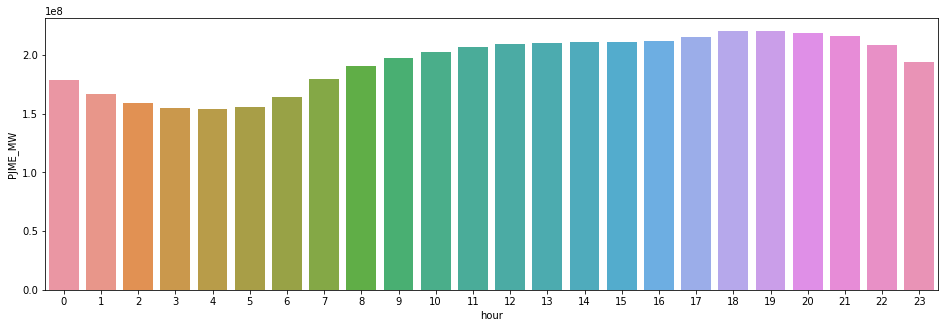

In [75]:
attribute_analysis('hour','PJME_MW')

From above figure it can be seen that from midnight to 5 a.m in the morning the energy consumption is low,and energy consumption increases from morning 6 am and keep increases till noon and reach peak consumtion in the evening 7 pm and again start fall

##### Year vs PJME_MW

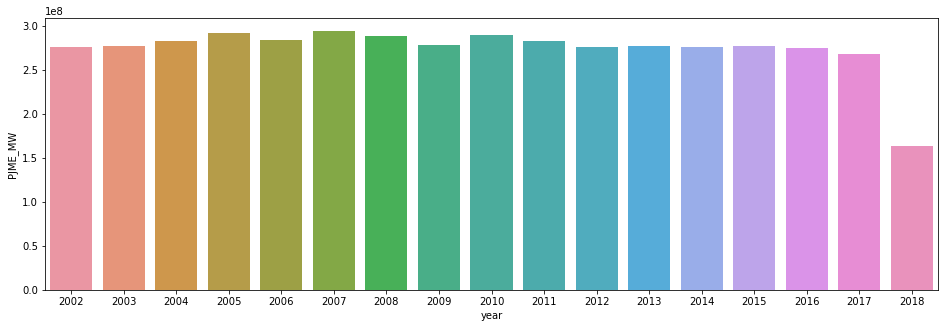

In [77]:
attribute_analysis('year','PJME_MW')

Energy consumption was high in the year 2007 and also little high energy consumption in 2005,2004,2008,2010,2011 and was minimum in the year 2018 while is remaining year the energy consumption was constant

##### Month vs PJME_MW

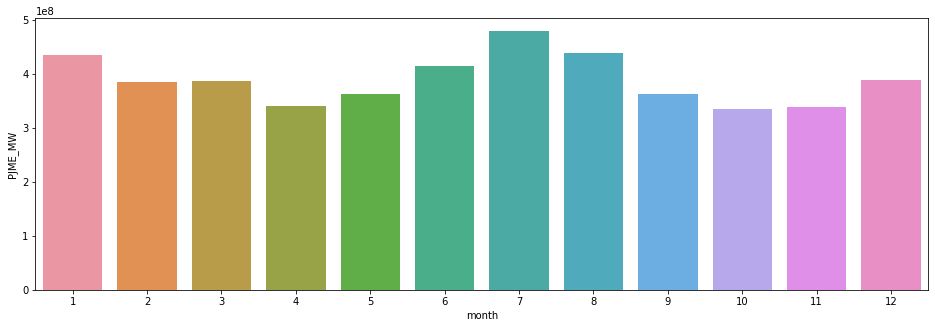

In [78]:
attribute_analysis('month','PJME_MW')

It can be seen energy consumption starts decreasing from month 1 to month 4 and then starts increasing from month 5 reaches peak at month 7 and then again starts falling<br>
The reason will be more clear when we plot energy consumption against season.<br>
it should be noted that in USA:<br>
Summer: June - August<br>
Fall: September - November<br>
Winter: December - February<br>
Spring: March - May

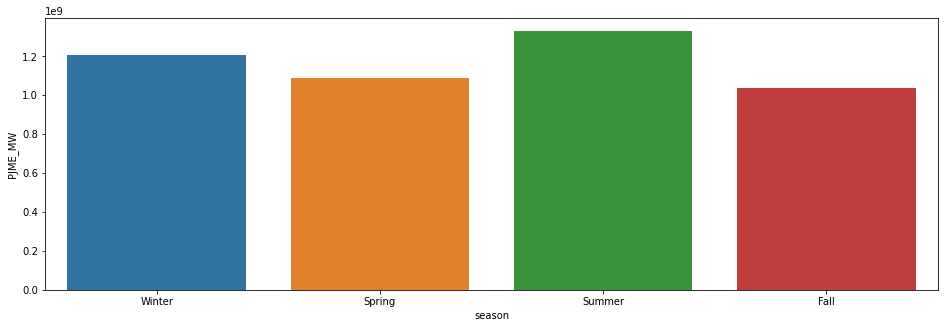

In [79]:
order = ['Winter', 'Spring', 'Summer', 'Fall']
attribute_analysis('season','PJME_MW',order=order)

SO from the latter 2 plots it can be seen that energy consumption is more in summer as it is obvious that in home and office /working places most electrical appliance are heavely used to beat summer<br>
followed by summer energy consumption is more in winter also which is obvious

##### Day vs PJME_MW

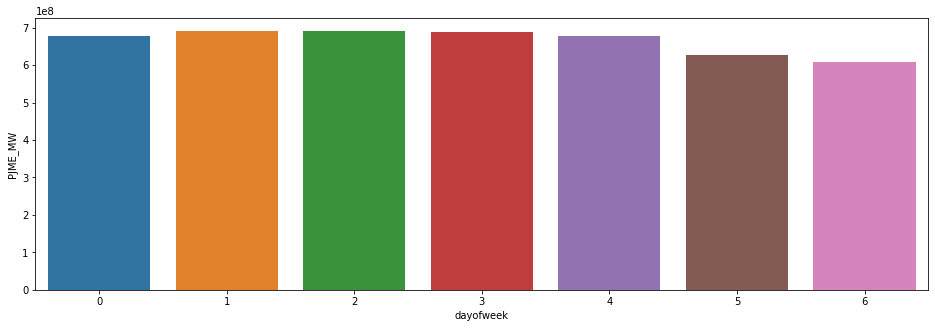

In [80]:
attribute_analysis('dayofweek','PJME_MW')

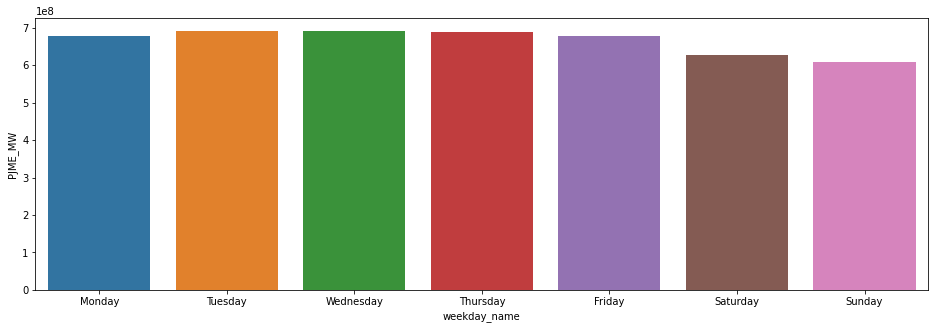

In [81]:
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
attribute_analysis('weekday_name','PJME_MW',order=week)

From above 2 plots it can be seen that enegy consumption is high on non-weekend while energy consumption is low during weekend may be because people go to other places or on vacation.

##### Public Holiday vs PJME_MW

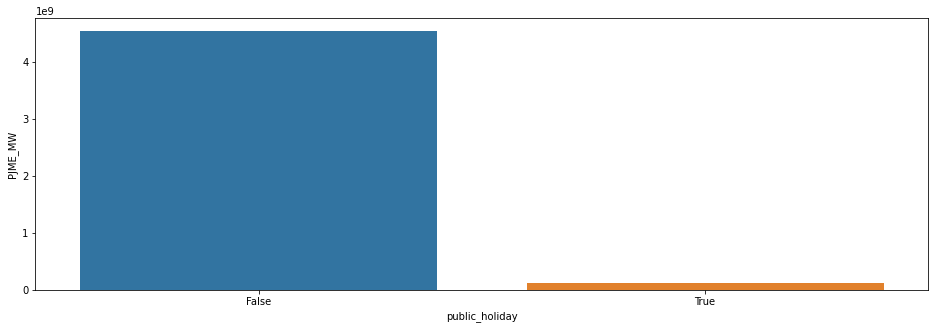

In [82]:
attribute_analysis('public_holiday','PJME_MW')

It can be seen the energy consumption is ver less during public holidays as compare to non public holidays as people love to spend time outdoor or travelling during holidays

##### working day vs Energy consumption

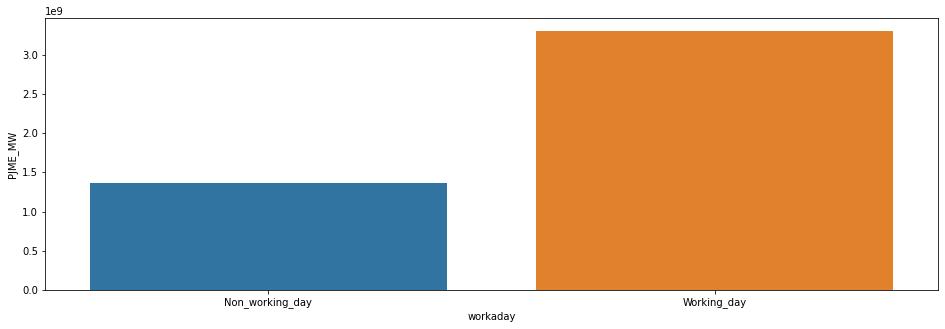

In [83]:
attribute_analysis('workaday','PJME_MW')

Energy consumption is high during working days as energy required by working places /area is more

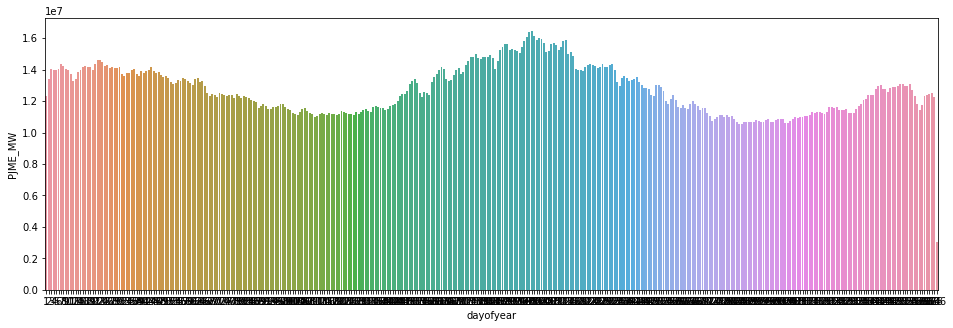

In [84]:
attribute_analysis('dayofyear','PJME_MW')

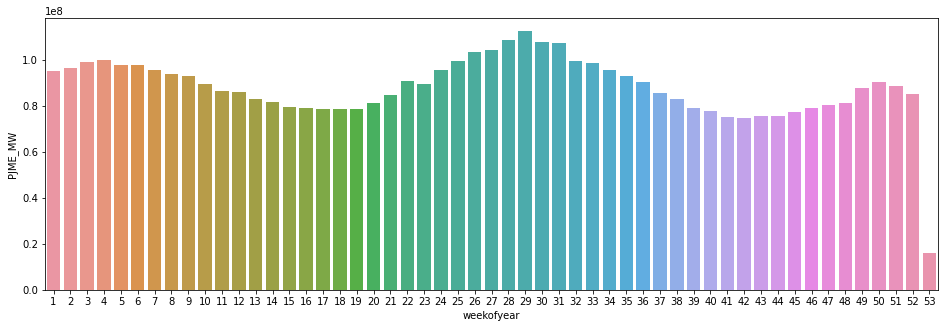

In [85]:
attribute_analysis('weekofyear','PJME_MW')

From above two plots We can see energy consumption is high during mid year and also at starting and end of year which we already see in season plot

##### Year and Month vs Energy consumption

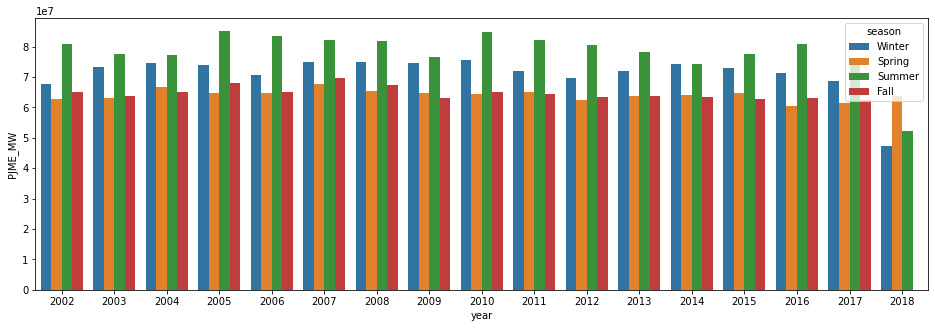

In [86]:
order = ['Winter', 'Spring', 'Summer', 'Fall']
attribute_analysis_1('year','season','PJME_MW',hue_order=order)

During each season,the energy consumption has been increasing year by year except the data from 2018 because it can be seen we have data of only 3 season for 2018 where energy consumption for summer and winter energy consumption has reduced because of less data

##### Month and weekday_name vs Energy Consumption

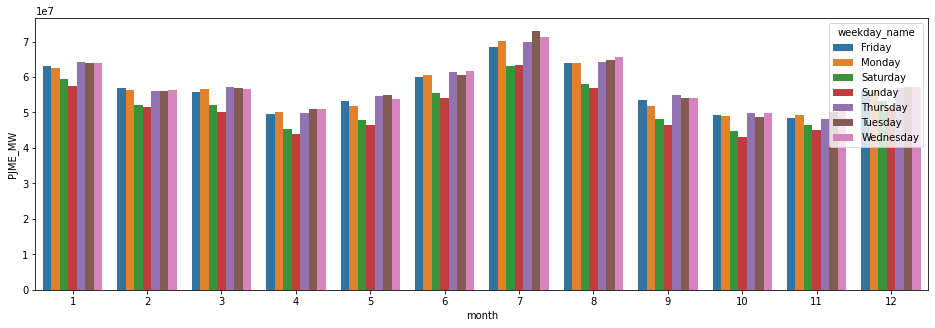

In [87]:
attribute_analysis_1('month','weekday_name','PJME_MW')

During each weekday the energy consumption increases during mid month and at starting months and end months which has been seen in season plots

#### Correlation Matrix (Heatmap)

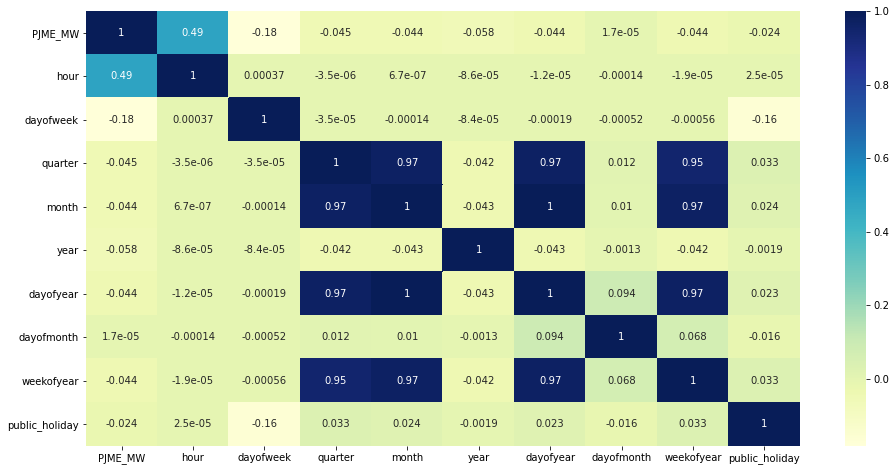

In [70]:
pjm_corr = pjm_data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(pjm_corr, annot=True,cmap="YlGnBu")
plt.show()

The month,day of year, week of year,quarter have a very high correlation.The month,day of year ,week of year with quarter have the highest correlation with more than 0.9.The day of year ,week of the year with month have the correlation wih more than 0.95.The week of year with day of year have high correlation of more than 0.9.

## Future Task

1. since the time series data is non-stationary and right skewed first we have to make it stationary by doing natural transformation as most of the model for forecasting time series forecast very well on stationary data.<br>
after converting it to stationary data we will again do hypothesis testing to recheck whether it is stationary or not and the various transformation can be used as features

2. since the data is very large and models like moving average,weighted moving average,exponential smoothing works fairly well for forecasting purpose when dataset is small so one thing can be done is try using this models as feature engineering/new features and see are these going to help in forecasting by looking at feature importance and based on feature importance we will do feature selection

3. we will split the data based on time stamp and do machine and deep learning modelling 
 